In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np

import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import glob
from tqdm import tqdm
from collections import OrderedDict, defaultdict
from IPython.display import clear_output
import time
import os

In [2]:
dir="/home/ns/data_activity/clips_eating/"
files=glob.glob(dir+"*")
print(len(files))

100


In [3]:
pose = mp.solutions.pose.Pose(static_image_mode=False, min_detection_confidence=0.5, min_tracking_confidence=0.5)
def extract_keypoints(image_rgb): 
    try:
        results = pose.process(image_rgb)
        landmarks=results.pose_landmarks.landmark
    except Exception as e:
        # print('Error file=', fn)
        # print('Error=', e)
        return None
    xys=[]
    for landmark in landmarks:
        xys.append([landmark.x, landmark.y])
    xys=np.array(xys)
    return xys

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [4]:
def extract_imgs(video_fn, skip_frames=1):
    video=cv2.VideoCapture(video_fn)
    imgs=[]
    frame_count=0
    while(video.isOpened()):
        ret, frame = video.read()
        if ret==False: break
        if frame_count%skip_frames==0:
            imgs.append(frame)
        frame_count+=1
    video.release() 
    return imgs

In [5]:
frame_counts=[]
for file in tqdm(files):
    imgs=extract_imgs(file)
    frame_counts.append(len(imgs))  
    del imgs

print(np.mean(frame_counts), np.min(frame_counts), np.max(frame_counts))

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:41<00:00,  2.38it/s]

78.98 37 210


In [6]:
print(np.mean(frame_counts), np.min(frame_counts), np.max(frame_counts))

78.98 37 210


In [7]:
skip_frames=2
actions=[]
for file in tqdm(files):
    imgs=extract_imgs(file)
    action_imgs= imgs[0:len(imgs):skip_frames]

    action=[]
    for img in action_imgs: 
        image_rgb=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        xys=extract_keypoints(image_rgb)
        if xys is None: 
            print('Error file=', file)
            continue
    
        xys=xys[:25].ravel() #first 25 keypoints
        
        action.append(xys)
    
    action=np.array(action)
    actions.append(action)

len(imgs) , len(action_imgs)

  7%|▋         | 7/100 [00:20<04:57,  3.20s/it]

Error file= /home/ns/data_activity/clips_eating/Morning coffee-July 1_1.mp4


  9%|▉         | 9/100 [00:27<04:58,  3.28s/it]

Error file= /home/ns/data_activity/clips_eating/Mom having dinner _0.mp4


 56%|█████▌    | 56/100 [02:50<03:42,  5.05s/it]

Error file= /home/ns/data_activity/clips_eating/Morning cereal-Mom_3.mp4
Error file= /home/ns/data_activity/clips_eating/Morning cereal-Mom_3.mp4
Error file= /home/ns/data_activity/clips_eating/Morning cereal-Mom_3.mp4
Error file= /home/ns/data_activity/clips_eating/Morning cereal-Mom_3.mp4
Error file= /home/ns/data_activity/clips_eating/Morning cereal-Mom_3.mp4
Error file= /home/ns/data_activity/clips_eating/Morning cereal-Mom_3.mp4
Error file= /home/ns/data_activity/clips_eating/Morning cereal-Mom_3.mp4
Error file= /home/ns/data_activity/clips_eating/Morning cereal-Mom_3.mp4
Error file= /home/ns/data_activity/clips_eating/Morning cereal-Mom_3.mp4
Error file= /home/ns/data_activity/clips_eating/Morning cereal-Mom_3.mp4
Error file= /home/ns/data_activity/clips_eating/Morning cereal-Mom_3.mp4
Error file= /home/ns/data_activity/clips_eating/Morning cereal-Mom_3.mp4
Error file= /home/ns/data_activity/clips_eating/Morning cereal-Mom_3.mp4
Error file= /home/ns/data_activity/clips_eating/Mor

 57%|█████▋    | 57/100 [02:54<03:20,  4.65s/it]

Error file= /home/ns/data_activity/clips_eating/Morning cereal-Mom_3.mp4


 68%|██████▊   | 68/100 [03:27<01:58,  3.71s/it]

Error file= /home/ns/data_activity/clips_eating/Natasha Eating 1_6.mp4


 69%|██████▉   | 69/100 [03:30<01:44,  3.36s/it]

Error file= /home/ns/data_activity/clips_eating/Natasha Eating 2_8.mp4


 89%|████████▉ | 89/100 [04:33<00:31,  2.84s/it]

Error file= /home/ns/data_activity/clips_eating/Natasha Eating 1_10.mp4


 90%|█████████ | 90/100 [04:38<00:36,  3.65s/it]

Error file= /home/ns/data_activity/clips_eating/Natasha Eating 2_9.mp4


100%|██████████| 100/100 [05:06<00:00,  3.07s/it]


(39, 20)

In [8]:
len(actions)

100

In [9]:
sizes=[]
for action in actions:
    sizes.append(action.shape[0])

In [10]:
action.shape

(20, 50)

In [11]:
np.median(sizes), np.mean(sizes), np.min(sizes), np.max(sizes)

(33.5, 39.49, 19, 105)

In [12]:
actions_selected=[]
seq_len=30
for action in actions:
    if len(action) < seq_len: continue
    actions_selected.append(action[:seq_len])

actions_selected=np.array(actions_selected)
actions_selected.shape

(63, 30, 50)

### loading not-eating

In [41]:
dir="/home/ns/data_activity/clips_noteating/"
files=glob.glob(dir+"*")
print(len(files))

25


In [42]:
skip_frames=2
actions=[]
for file in tqdm(files):
    imgs=extract_imgs(file)
    action_imgs= imgs[0:len(imgs):skip_frames]

    action=[]
    for img in action_imgs: 
        image_rgb=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        xys=extract_keypoints(image_rgb)
        if xys is None: 
            print('Error file=', file)
            continue
    
        xys=xys[:25].ravel() #first 25 keypoints
        
        action.append(xys)
    
    action=np.array(action)
    actions.append(action)

len(imgs) , len(action_imgs)

 56%|█████▌    | 14/25 [01:40<01:16,  6.96s/it]

Error file= clips_noteating/Dain Eating 2_9.mp4


 76%|███████▌  | 19/25 [02:19<00:44,  7.41s/it]

Error file= clips_noteating/Dain Eating 2_1.mp4


100%|██████████| 25/25 [03:05<00:00,  7.44s/it]


(190, 95)

In [43]:
actions_selected_not=[]
seq_len=30
for action in actions:
    if len(action) < seq_len: continue
    actions_selected_not.append(action[:seq_len])

actions_selected_not=np.array(actions_selected_not)
actions_selected_not.shape

(25, 30, 50)

In [44]:
X_eating=actions_selected
X_not_eating=actions_selected_not

In [45]:
X=np.concatenate((X_eating, X_not_eating))
y=np.array([1]*X_eating.shape[0]+[0]*X_not_eating.shape[0])
X.shape, y.shape

((88, 30, 50), (88,))

In [61]:
X=torch.from_numpy(X).float()
y=torch.from_numpy(y).reshape(-1,1)
X.shape, y.shape

(torch.Size([88, 30, 50]), torch.Size([88, 1]))

In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np

import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import glob
from tqdm import tqdm
from collections import OrderedDict, defaultdict
from IPython.display import clear_output
import time
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim 

In [47]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device

device(type='cuda')

In [62]:
ids=np.arange(X.shape[0])
np.random.shuffle(ids)
train_ids=ids[:int(len(ids)*0.8)]
test_ids=ids[int(len(ids)*0.8):]
X_train, y_train=X[train_ids], y[train_ids]
X_test, y_test=X[test_ids], y[test_ids]
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([70, 30, 50]),
 torch.Size([70, 1]),
 torch.Size([18, 30, 50]),
 torch.Size([18, 1]))

In [63]:
class LSTM(nn.Module):
    
    def __init__(self,input_dim,hidden_dim,output_dim,layer_num, seq_len):
        super(LSTM,self).__init__()
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.lstm = torch.nn.LSTM(input_dim,hidden_dim,layer_num,batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim,output_dim)
        self.bn = nn.BatchNorm1d(seq_len)
        
    def forward(self,inputs):
        x = self.bn(inputs)
        lstm_out,(hn,cn) = self.lstm(x)
        out = self.fc(lstm_out[:,-1,:])
        return out

In [64]:
import random
n_data_size_train = X_train.shape[0]
n_data_size_test = X_test.shape[0]

def randomTrainingExampleBatch(batch_size,flag,num=-1):
    if flag == 'train':
        X = X_train
        y = y_train
        data_size = n_data_size_train
    elif flag == 'test':
        X = X_test
        y = y_test
        data_size = n_data_size_test
    if num == -1:
        ran_num = random.randint(0,data_size-batch_size)
    else:
        ran_num = num
    pose_sequence_tensor = X[ran_num:(ran_num+batch_size)]
    pose_sequence_tensor = pose_sequence_tensor
    category_tensor = y[ran_num:ran_num+batch_size,:]
    return category_tensor.long(),pose_sequence_tensor

In [70]:
n_hidden = 128
n_joints = 25*2
n_categories = 2
n_layer = 3
seq_len = 30
rnn = LSTM(n_joints,n_hidden,n_categories,n_layer, seq_len)
rnn.to(device)

LSTM(
  (lstm): LSTM(50, 128, num_layers=3, batch_first=True)
  (fc): Linear(in_features=128, out_features=2, bias=True)
  (bn): BatchNorm1d(30, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [71]:
criterion = nn.CrossEntropyLoss()
learning_rate = 0.0005
optimizer = optim.SGD(rnn.parameters(),lr=learning_rate,momentum=0.9)
#scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10000, gamma=0.1)

In [72]:
n_iters = 8_000
print_every = 1000
plot_every = 1000
batch_size = 4

# Keep track of losses for plotting
current_loss = 0
all_losses = []

 
start = time.time()

for iter in range(1, n_iters + 1):
   
    category_tensor, input_sequence = randomTrainingExampleBatch(batch_size,'train')
    input_sequence = input_sequence.to(device)
    category_tensor = category_tensor.to(device)
    category_tensor = torch.squeeze(category_tensor)
    
    optimizer.zero_grad()
    
    output = rnn(input_sequence)
    loss = criterion(output, category_tensor)
    loss.backward()
    optimizer.step() 
 
    current_loss += loss.item()

    print('iter: %d, loss: %.3f' % (iter, loss.item()))
    
    
    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

iter: 1, loss: 0.715
iter: 2, loss: 0.705
iter: 3, loss: 0.684
iter: 4, loss: 0.683
iter: 5, loss: 0.704
iter: 6, loss: 0.703
iter: 7, loss: 0.704
iter: 8, loss: 0.704
iter: 9, loss: 0.703
iter: 10, loss: 0.703
iter: 11, loss: 0.701
iter: 12, loss: 0.694
iter: 13, loss: 0.687
iter: 14, loss: 0.707
iter: 15, loss: 0.687
iter: 16, loss: 0.699
iter: 17, loss: 0.699
iter: 18, loss: 0.689
iter: 19, loss: 0.699
iter: 20, loss: 0.699
iter: 21, loss: 0.698
iter: 22, loss: 0.701
iter: 23, loss: 0.698
iter: 24, loss: 0.693
iter: 25, loss: 0.695
iter: 26, loss: 0.695
iter: 27, loss: 0.693
iter: 28, loss: 0.694
iter: 29, loss: 0.692
iter: 30, loss: 0.690
iter: 31, loss: 0.690
iter: 32, loss: 0.689
iter: 33, loss: 0.690
iter: 34, loss: 0.684
iter: 35, loss: 0.694
iter: 36, loss: 0.700
iter: 37, loss: 0.679
iter: 38, loss: 0.703
iter: 39, loss: 0.676
iter: 40, loss: 0.704
iter: 41, loss: 0.674
iter: 42, loss: 0.671
iter: 43, loss: 0.682
iter: 44, loss: 0.669
iter: 45, loss: 0.694
iter: 46, loss: 0.6

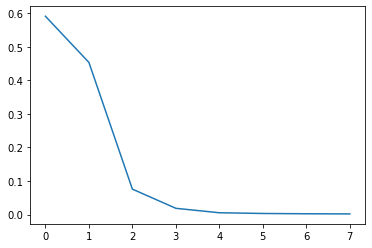

In [73]:
plt.plot(all_losses)

In [75]:
#test 

rnn.eval()

n_correct = 0
n_total = 0
for i in range(n_data_size_test):
    category_tensor, input_sequence = randomTrainingExampleBatch(1,'test',i)
    input_sequence = input_sequence.to(device)
    category_tensor = category_tensor.to(device)
    category_tensor = torch.squeeze(category_tensor)
    output = rnn(input_sequence)
    po=output.argmax(axis=1)
    guess=po.item()
    category = category_tensor
    if category == guess:
        n_correct += 1
    n_total += 1

print('Accuracy of %d test data: %.3f%%' % (n_data_size_test, n_correct / n_total * 100))

Accuracy of 18 test data: 88.889%


In [76]:
#save model
torch.save(rnn.state_dict(), 'lstm_model_eatnot1.pth')  